In [87]:
##Coisas Pra fazer
## Limpar dados Waiting e testar

## Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import sklearn;
import warnings
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.preprocessing import OneHotEncoder

print("Scikit-Learn", sklearn.__version__)

Scikit-Learn 0.23.1


In [2]:
from azureml.core import Workspace, Dataset

subscription_id = 'f96504ea-3bda-4949-9b74-1e01b823c2a5'
resource_group = '819153657-rg'
workspace_name = 'Skynet'

workspace = Workspace(subscription_id, resource_group, workspace_name)

dataset_treino = Dataset.get_by_name(workspace, name='dataset_train_bank')
dataset_treino = dataset_treino.to_pandas_dataframe()

In [3]:
subscription_id = 'f96504ea-3bda-4949-9b74-1e01b823c2a5'
resource_group = '819153657-rg'
workspace_name = 'Skynet'

workspace = Workspace(subscription_id, resource_group, workspace_name)

dataset_teste = Dataset.get_by_name(workspace, name='dataset_test_bank')
dataset_teste = dataset_teste.to_pandas_dataframe()

## Juntando os dois Dataset (treino e teste)

In [4]:
dataset = pd.concat([dataset_teste,dataset_treino])

In [11]:
dataset_treino

ID  Loan Amount  Funded Amount  Funded Amount Investor  Term  \
0      65087372        10000          32236             12329.36286    59   
1       1450153         3609          11940             12191.99692    59   
2       1969101        28276           9311             21603.22455    59   
3       6651430        11170           6954             17877.15585    59   
4      14354669        16890          13226             13539.92667    59   
...         ...          ...            ...                     ...   ...   
67458  16164945        13601           6848             13175.28583    59   
67459  35182714         8323          11046             15637.46301    59   
67460  16435904        15897          32921             12329.45775    59   
67461   5300325        16567           4975             21353.68465    59   
67462  65443173        15353          29875             14207.44860    59   

      Batch Enrolled  Interest Rate Grade Sub Grade Employment Duration  ...  \
0         BAT2522922      11.135007     B        C4            MORTGAGE  ...   
1         BAT1586599      12.237563     C        D3                RENT  ...   
2         BAT2136391      12.545884     F        D4            MORTGAGE  ...   
3         BAT2428731      16.731201     C        C3            MORTGAGE  ...   
4         BAT5341619      15.008300     C        D4            MORTGAGE  ...   
...              ...            ...   ...       ...                 ...  ...   
67458     BAT3193689       9.408858     C        A4            MORTGAGE  ...   
67459     BAT1780517       9.972104     C        B3                RENT  ...   
67460     BAT1761981      19.650943     A        F3            MORTGAGE  ...   
67461     BAT2333412      13.169095     D        E3                 OWN  ...   
67462     BAT1930365      16.034631     B        D1            MORTGAGE  ...   

        Recoveries Collection Recovery Fee Collection 12 months Medical  \
0         2.498291                0.793724                            0   
1         2.377215                0.974821                            0   
2         4.316277                1.020075                            0   
3         0.107020                0.749971                            0   
4      1294.818751                0.368953                            0   
...            ...                     ...                          ...   
67458   564.614852                0.865230                            0   
67459     2.015494                1.403368                            0   
67460     5.673092                1.607093                            0   
67461     1.157454                0.207608                            0   
67462     1.856480                0.366386                            0   

      Application Type  Last week Pay  Accounts Delinquent  \
0           INDIVIDUAL             49                    0   
1           INDIVIDUAL            109                    0   
2           INDIVIDUAL             66                    0   
3           INDIVIDUAL             39                    0   
4           INDIVIDUAL             18                    0   
...                ...            ...                  ...   
67458       INDIVIDUAL             69                    0   
67459       INDIVIDUAL             14                    0   
67460       INDIVIDUAL            137                    0   
67461       INDIVIDUAL             73                    0   
67462       INDIVIDUAL             54                    0   

       Total Collection Amount  Total Current Balance  \
0                           31                 311301   
1                           53                 182610   
2                           34                  89801   
3                           40                   9189   
4                          430                 126029   
...                        ...                    ...   
67458                       48                 181775   
67459                    

In [13]:
dataset_treino.Term.unique()

array([59, 36, 58])

In [5]:
dataset.shape

(96376, 35)

In [6]:
dataset.head()

ID  Loan Amount  Funded Amount  Funded Amount Investor  Term  \
0  56492997        17120          10365            16025.082690    59   
1  22540813         7133          11650            12615.795600    59   
2   9862181        25291          25825            11621.280830    59   
3  10097822        30781           9664            15375.823510    59   
4  47771809         8878           9419             7176.647582    58   

  Batch Enrolled  Interest Rate Grade Sub Grade Employment Duration  ...  \
0     BAT2575549      12.163926     A        D1                RENT  ...   
1     BAT2833642       6.564296     B        E3            MORTGAGE  ...   
2     BAT1761981      14.729900     A        C3            MORTGAGE  ...   
3     BAT5341619      10.523767     A        A2                RENT  ...   
4     BAT4694572       9.997013     C        B3                 OWN  ...   

   Recoveries Collection Recovery Fee Collection 12 months Medical  \
0    8.425776                0.731797                            0   
1    6.157008                0.992918                            0   
2    5.705077                0.281580                            0   
3    2.469688                0.959162                            0   
4    2.127835                0.402315                            0   

  Application Type  Last week Pay  Accounts Delinquent  \
0       INDIVIDUAL            135                    0   
1       INDIVIDUAL             56                    0   
2       INDIVIDUAL              3                    0   
3       INDIVIDUAL             21                    0   
4       INDIVIDUAL            104                    0   

   Total Collection Amount  Total Current Balance  \
0                       24                 475442   
1                        1                  72412   
2                       26                 284825   
3                       32                  40842   
4                       33                  90825   

   Total Revolving Credit Limit  Loan Status  
0                          4364         None  
1                          2573         None  
2                         19676         None  
3                          7226         None  
4                         26145         None  

[5 rows x 35 columns]

In [9]:
dataset.columns

Index(['ID', 'Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term',
       'Batch Enrolled', 'Interest Rate', 'Grade', 'Sub Grade',
       'Employment Duration', 'Home Ownership', 'Verification Status',
       'Payment Plan', 'Loan Title', 'Debit to Income',
       'Delinquency - two years', 'Inquires - six months', 'Open Account',
       'Public Record', 'Revolving Balance', 'Revolving Utilities',
       'Total Accounts', 'Initial List Status', 'Total Received Interest',
       'Total Received Late Fee', 'Recoveries', 'Collection Recovery Fee',
       'Collection 12 months Medical', 'Application Type', 'Last week Pay',
       'Accounts Delinquent', 'Total Collection Amount',
       'Total Current Balance', 'Total Revolving Credit Limit', 'Loan Status'],
      dtype='object')

In [10]:
display(dataset.describe(include='all').T)
display(dataset.describe(include='float').T)
dataset.describe(include='object').T

count unique                      top   freq  \
ID                            96376    NaN                      NaN    NaN   
Loan Amount                   96376    NaN                      NaN    NaN   
Funded Amount                 96376    NaN                      NaN    NaN   
Funded Amount Investor        96376    NaN                      NaN    NaN   
Term                          96376    NaN                      NaN    NaN   
Batch Enrolled                96376     41               BAT3873588   5249   
Interest Rate                 96376    NaN                      NaN    NaN   
Grade                         96376      7                        C  27189   
Sub Grade                     96376     35                       B4   6364   
Employment Duration           96376      3                 MORTGAGE  51881   
Home Ownership                96376    NaN                      NaN    NaN   
Verification Status           96376      3          Source Verified  46662   
Payment Plan                  96376      1                        n  96376   
Loan Title                    96376    109  Credit card refinancing  42084   
Debit to Income               96376    NaN                      NaN    NaN   
Delinquency - two years       96376    NaN                      NaN    NaN   
Inquires - six months         96376    NaN                      NaN    NaN   
Open Account                  96376    NaN                      NaN    NaN   
Public Record                 96376    NaN                      NaN    NaN   
Revolving Balance             96376    NaN                      NaN    NaN   
Revolving Utilities           96376    NaN                      NaN    NaN   
Total Accounts                96376    NaN                      NaN    NaN   
Initial List Status           96376      2                        w  52147   
Total Received Interest       96376    NaN                      NaN    NaN   
Total Received Late Fee       96376    NaN                      NaN    NaN   
Recoveries                    96376    NaN                      NaN    NaN   
Collection Recovery Fee       96376    NaN                      NaN    NaN   
Collection 12 months Medical  96376    NaN                      NaN    NaN   
Application Type              96376      2               INDIVIDUAL  96223   
Last week Pay                 96376    NaN                      NaN    NaN   
Accounts Delinquent           96376    NaN                      NaN    NaN   
Total Collection Amount       96376    NaN                      NaN    NaN   
Total Current Balance         96376    NaN                      NaN    NaN   
Total Revolving Credit Limit  96376    NaN                      NaN    NaN   
Loan Status                   67463      2                        0  61222   

                                     mean          std          min  \
ID                            2.67742e+07  2.14608e+07  1.29789e+06   
Loan Amount                       16715.4      8367.62         1000   
Funded Amount                     15725.4      8175.02         1000   
Funded Amount Investor            14657.7      6922.05         1000   
Term                              57.0846      5.89694           36   
Batch Enrolled                        NaN          NaN          NaN   
Interest Rate                     11.9487      3.78067         5.32   
Grade                                 NaN          NaN          NaN   
Sub Grade                             NaN          NaN          NaN   
Employment Duration                   NaN          NaN          NaN   
Home Ownership                    80374.2      45090.4      14573.5   
Verification Status                   NaN          NaN          NaN   
Payment Plan                          NaN          NaN          NaN   
Loan Title                            NaN          NaN          NaN   
Debit to Income                   22.9572      8.53005     0.675299   
Delinquency - two years          0.328609     0.806324            0   
Inquires - six

count          mean           std           min  \
Funded Amount Investor   96376.0  14657.720784   6922.046851   1000.000000   
Interest Rate            96376.0     11.948654      3.780666      5.320000   
Home Ownership           96376.0  80374.176313  45090.364452  14573.537170   
Debit to Income          96376.0     22.957246      8.530055      0.675299   
Revolving Utilities      96376.0     53.180635     22.622700      0.000000   
Total Received Interest  96376.0   2023.620796   2189.868833      4.736746   
Total Received Late Fee  96376.0      1.077636      5.106276      0.000000   
Recoveries               96376.0     56.971569    351.002990      0.000000   
Collection Recovery Fee  96376.0      1.205565      8.792240      0.000000   

                                  25%           50%           75%  \
Funded Amount Investor    9800.036208  12826.006220  18382.681482   
Interest Rate                9.326588     11.471511     14.330000   
Home Ownership           51459.374772  69217.985460  94650.134950   
Debit to Income             16.424179     22.296056     29.678280   
Revolving Utilities         38.738736     54.300000     69.558319   
Total Received Interest    556.767119   1293.762340   2603.953475   
Total Received Late Fee      0.015861      0.039509      0.069122   
Recoveries                   1.234178      3.047889      5.238548   
Collection Recovery Fee      0.386589      0.732590      1.046001   

                                   max  
Funded Amount Investor    35000.000000  
Interest Rate                27.310000  
Home Ownership           406944.859000  
Debit to Income              39.629977  
Revolving Utilities         100.880050  
Total Received Interest   14313.816110  
Total Received Late Fee      42.618882  
Recoveries                 4354.467419  
Collection Recovery Fee     743.166000

count unique                      top   freq
Batch Enrolled       96376     41               BAT3873588   5249
Grade                96376      7                        C  27189
Sub Grade            96376     35                       B4   6364
Employment Duration  96376      3                 MORTGAGE  51881
Verification Status  96376      3          Source Verified  46662
Payment Plan         96376      1                        n  96376
Loan Title           96376    109  Credit card refinancing  42084
Initial List Status  96376      2                        w  52147
Application Type     96376      2               INDIVIDUAL  96223
Loan Status          67463      2                        0  61222

In [7]:
dataset['Loan Title'] = dataset['Loan Title'].str.lower()

In [8]:
dataset['Loan Title'] = dataset['Loan Title'].replace('home improvement','1')
dataset['Loan Title'] = dataset['Loan Title'].replace('home improvement loan','1')
dataset['Loan Title'] = dataset['Loan Title'].replace('home loan','1')
dataset['Loan Title'] = dataset['Loan Title'].replace('home buying','1')
dataset['Loan Title'] = dataset['Loan Title'].replace('home','1')
dataset['Loan Title'] = dataset['Loan Title'].replace('house','1')
dataset['Loan Title'] = dataset['Loan Title'].replace('moving and relocation','1')
dataset['Loan Title'] = dataset['Loan Title'].replace('pool','1')
dataset['Loan Title'] = dataset['Loan Title'].replace('bathroom','1')
dataset['Loan Title'] = dataset['Loan Title'].replace('green loan','1')

dataset['Loan Title'] = dataset['Loan Title'].replace('credit card refinancing','2')
dataset['Loan Title'] = dataset['Loan Title'].replace('credit card consolidation','2')
dataset['Loan Title'] = dataset['Loan Title'].replace('credit card debt','2')
dataset['Loan Title'] = dataset['Loan Title'].replace('credit card refinance','2')
dataset['Loan Title'] = dataset['Loan Title'].replace('credit card refinance loan','2')
dataset['Loan Title'] = dataset['Loan Title'].replace('credit card loan','2')
dataset['Loan Title'] = dataset['Loan Title'].replace('credit card payoff','2')
dataset['Loan Title'] = dataset['Loan Title'].replace('credit cards','2')
dataset['Loan Title'] = dataset['Loan Title'].replace('credit card pay off','2')
dataset['Loan Title'] = dataset['Loan Title'].replace('credit card refi','2')
dataset['Loan Title'] = dataset['Loan Title'].replace('credit card paydown','2')
dataset['Loan Title'] = dataset['Loan Title'].replace('credit card','2')
dataset['Loan Title'] = dataset['Loan Title'].replace('credit consolidation','2')
dataset['Loan Title'] = dataset['Loan Title'].replace('credit loan','2')
dataset['Loan Title'] = dataset['Loan Title'].replace('credit payoff','2')
dataset['Loan Title'] = dataset['Loan Title'].replace('credit pay off','2')
dataset['Loan Title'] = dataset['Loan Title'].replace('credit','2')
dataset['Loan Title'] = dataset['Loan Title'].replace('cc loan','2')
dataset['Loan Title'] = dataset['Loan Title'].replace('cc consolidation','2')
dataset['Loan Title'] = dataset['Loan Title'].replace('cc-refinance','2')
dataset['Loan Title'] = dataset['Loan Title'].replace('cc refi','2')
dataset['Loan Title'] = dataset['Loan Title'].replace('cc refinance','2')
dataset['Loan Title'] = dataset['Loan Title'].replace('cc','2')
dataset['Loan Title'] = dataset['Loan Title'].replace('cards','2')
dataset['Loan Title'] = dataset['Loan Title'].replace('card consolidation','2')

dataset['Loan Title'] = dataset['Loan Title'].replace('debt consolidation','3')
dataset['Loan Title'] = dataset['Loan Title'].replace('debt consolidation loan','3')
dataset['Loan Title'] = dataset['Loan Title'].replace('debt consolidation 2013','3')
dataset['Loan Title'] = dataset['Loan Title'].replace('debt payoff','3')
dataset['Loan Title'] = dataset['Loan Title'].replace('debt free','3')
dataset['Loan Title'] = dataset['Loan Title'].replace('debt reduction','3')
dataset['Loan Title'] = dataset['Loan Title'].replace('debt loan','3')
dataset['Loan Title'] = dataset['Loan Title'].replace('debt','3')

dataset['Loan Title'] = dataset['Loan Title'].replace('get debt free','4')
dataset['Loan Title'] = dataset['Loan Title'].replace('get out of debt','4')
dataset['Loan Title'] = dataset['Loan Title'].replace('getting ahead','4')

dataset['Loan Title'] = dataset['Loan Title'].replace('car loan','5')
dataset['Loan Title'] = dataset['Loan Title'].replace('car financing','5')

dataset['Loan Title'] = dataset['Loan Title'].replace('myloan','6')
dataset['Loan Title'] = dataset['Loan Title'].replace('my loan','6')
dataset['Loan Title'] = dataset['Loan Title'].replace('loan1','6')
dataset['Loan Title'] = dataset['Loan Title'].replace('loan 1','6')
dataset['Loan Title'] = dataset['Loan Title'].replace('loan','6')
dataset['Loan Title'] = dataset['Loan Title'].replace('lending loan','6')
dataset['Loan Title'] = dataset['Loan Title'].replace('lending club','6')
dataset['Loan Title'] = dataset['Loan Title'].replace('personal loan','6')
dataset['Loan Title'] = dataset['Loan Title'].replace('personal','6')
dataset['Loan Title'] = dataset['Loan Title'].replace('vacation','6')
dataset['Loan Title'] = dataset['Loan Title'].replace('consolidation loan','6')
dataset['Loan Title'] = dataset['Loan Title'].replace('bill consolidation','6')
dataset['Loan Title'] = dataset['Loan Title'].replace('dept consolidation','6')
dataset['Loan Title'] = dataset['Loan Title'].replace('loan consolidation','6')
dataset['Loan Title'] = dataset['Loan Title'].replace('consolidation','6')
dataset['Loan Title'] = dataset['Loan Title'].replace('consolidate','6')
dataset['Loan Title'] = dataset['Loan Title'].replace('consolidated','6')
dataset['Loan Title'] = dataset['Loan Title'].replace('conso','6')

dataset['Loan Title'] = dataset['Loan Title'].replace('medical loan','7')
dataset['Loan Title'] = dataset['Loan Title'].replace('medical','7')
dataset['Loan Title'] = dataset['Loan Title'].replace('medical expenses','7')

dataset['Loan Title'] = dataset['Loan Title'].replace('refinance loan','8')
dataset['Loan Title'] = dataset['Loan Title'].replace('refinance','8')
dataset['Loan Title'] = dataset['Loan Title'].replace('refi','8')

dataset['Loan Title'] = dataset['Loan Title'].replace('other','9')
dataset['Loan Title'] = dataset['Loan Title'].replace('freedom','9')
dataset['Loan Title'] = dataset['Loan Title'].replace('major purchase','9')

dataset['Loan Title'] = dataset['Loan Title'].replace('bill payoff','10')
dataset['Loan Title'] = dataset['Loan Title'].replace('bills','10')
dataset['Loan Title'] = dataset['Loan Title'].replace('pay off bills','10')
dataset['Loan Title'] = dataset['Loan Title'].replace('payoff','10')
dataset['Loan Title'] = dataset['Loan Title'].replace('pay off','10')

dataset['Loan Title'] = dataset['Loan Title'].replace('wedding loan','11')

dataset['Loan Title'] = dataset['Loan Title'].replace('business','12')

dataset['Loan Title'] = dataset['Loan Title'].replace('relief','13')

In [9]:
dataset['Loan Title'] = dataset['Loan Title'].astype('int64')

In [10]:
dataset.columns

Index(['ID', 'Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term',
       'Batch Enrolled', 'Interest Rate', 'Grade', 'Sub Grade',
       'Employment Duration', 'Home Ownership', 'Verification Status',
       'Payment Plan', 'Loan Title', 'Debit to Income',
       'Delinquency - two years', 'Inquires - six months', 'Open Account',
       'Public Record', 'Revolving Balance', 'Revolving Utilities',
       'Total Accounts', 'Initial List Status', 'Total Received Interest',
       'Total Received Late Fee', 'Recoveries', 'Collection Recovery Fee',
       'Collection 12 months Medical', 'Application Type', 'Last week Pay',
       'Accounts Delinquent', 'Total Collection Amount',
       'Total Current Balance', 'Total Revolving Credit Limit', 'Loan Status'],
      dtype='object')

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96376 entries, 0 to 67462
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            96376 non-null  int64  
 1   Loan Amount                   96376 non-null  int64  
 2   Funded Amount                 96376 non-null  int64  
 3   Funded Amount Investor        96376 non-null  float64
 4   Term                          96376 non-null  int64  
 5   Batch Enrolled                96376 non-null  object 
 6   Interest Rate                 96376 non-null  float64
 7   Grade                         96376 non-null  object 
 8   Sub Grade                     96376 non-null  object 
 9   Employment Duration           96376 non-null  object 
 10  Home Ownership                96376 non-null  float64
 11  Verification Status           96376 non-null  object 
 12  Payment Plan                  96376 non-null  object 
 13  L

In [12]:
nao_entram = ['ID','Payment Plan','Application Type']

In [13]:
dataset['Loan Status'].isna().sum()
dataset = dataset.dropna(subset=['Loan Status'])

In [14]:
dataset['Loan Status'] = dataset['Loan Status'].astype('int64')

In [15]:
colunasEncoding = ['Batch Enrolled','Grade','Sub Grade','Employment Duration','Verification Status','Initial List Status']

In [16]:
dataset_encode = dataset.drop(colunasEncoding, axis=1)
dataset_encode =dataset_encode.drop(nao_entram,axis=1)
dataset_encode.columns

Index(['Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term',
       'Interest Rate', 'Home Ownership', 'Loan Title', 'Debit to Income',
       'Delinquency - two years', 'Inquires - six months', 'Open Account',
       'Public Record', 'Revolving Balance', 'Revolving Utilities',
       'Total Accounts', 'Total Received Interest', 'Total Received Late Fee',
       'Recoveries', 'Collection Recovery Fee', 'Collection 12 months Medical',
       'Last week Pay', 'Accounts Delinquent', 'Total Collection Amount',
       'Total Current Balance', 'Total Revolving Credit Limit', 'Loan Status'],
      dtype='object')

In [17]:
encoder = OneHotEncoder(dtype=int)
colunas_restantes = encoder.fit_transform(dataset[colunasEncoding]).toarray()


In [18]:
dataset_encode = pd.concat([dataset_encode, pd.DataFrame(colunas_restantes, columns=encoder.get_feature_names(colunasEncoding))], axis=1)
dataset_encode.head()

Loan Amount  Funded Amount  Funded Amount Investor  Term  Interest Rate  \
0        10000          32236             12329.36286    59      11.135007   
1         3609          11940             12191.99692    59      12.237563   
2        28276           9311             21603.22455    59      12.545884   
3        11170           6954             17877.15585    59      16.731201   
4        16890          13226             13539.92667    59      15.008300   

   Home Ownership  Loan Title  Debit to Income  Delinquency - two years  \
0    176346.62670           3        16.284758                        1   
1     39833.92100           3        15.412409                        0   
2     91506.69105           3        28.137619                        0   
3    108286.57590           3        18.043730                        1   
4     44234.82545           2        17.209886                        1   

   Inquires - six months  ...  Sub Grade_G4  Sub Grade_G5  \
0                      0  ...             0             0   
1                      0  ...             0             0   
2                      0  ...             0             0   
3                      0  ...             0             0   
4                      3  ...             0             0   

   Employment Duration_MORTGAGE  Employment Duration_OWN  \
0                             1                        0   
1                             0                        0   
2                             1                        0   
3                             1                        0   
4                             1                        0   

   Employment Duration_RENT  Verification Status_Not Verified  \
0                         0                                 1   
1                         1                                 0   
2                         0                                 0   
3                         0                                 0   
4                         0                                 0   

   Verification Status_Source Verified  Verification Status_Verified  \
0                                    0                             0   
1                                    1                             0   
2                                    1                             0   
3                                    1                             0   
4                                    1                             0   

   Initial List Status_f  Initial List Status_w  
0                      0                      1  
1                      1                      0  
2                      0                      1  
3                      0                      1  
4                      0                      1  

[5 rows x 117 columns]

In [19]:
for col in dataset_encode.columns:
    print(f'a coluna {col} tem os seguintes valores {dataset_encode[col].unique()}')

a coluna Loan Amount tem os seguintes valores [10000  3609 28276 ... 30703 17417  8323]
a coluna Funded Amount tem os seguintes valores [32236 11940  9311 ... 17672 32921 29875]
a coluna Funded Amount Investor tem os seguintes valores [12329.36286 12191.99692 21603.22455 ... 12329.45775 21353.68465
 14207.4486 ]
a coluna Term tem os seguintes valores [59 36 58]
a coluna Interest Rate tem os seguintes valores [11.13500686 12.23756263 12.54588365 ... 19.65094342 13.16909487
 16.03463076]
a coluna Home Ownership tem os seguintes valores [176346.6267   39833.921    91506.69105 ...  34813.96985  96938.83564
 105123.1558 ]
a coluna Loan Title tem os seguintes valores [ 3  2  1  9  7  8  6 12  5  4 10 11 13]
a coluna Debit to Income tem os seguintes valores [16.28475781 15.41240945 28.13761862 ... 10.29577356  7.61462376
 16.05211225]
a coluna Delinquency - two years tem os seguintes valores [1 0 3 6 2 7 5 4 8]
a coluna Inquires - six months tem os seguintes valores [0 3 2 1 4 5]
a coluna Ope

/tmp/ipykernel_5126/2821313037.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


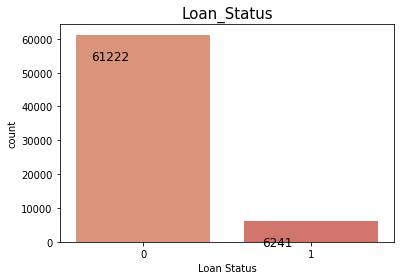

In [20]:
sns.set_palette("flare")
ax = sns.countplot(x='Loan Status', data=dataset)
ax.set_title('Loan_Status', fontsize=15)
ax = plt.subplot()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=12)
plt.show()

## Normalização de variáveis e colunas

### Retirando valores vazios e mudando o tipo da variavel Target

dataset['Grade_A'] = np.where(dataset['Grade'].isin(['A']),1,0)
dataset['Grade_B'] = np.where(dataset['Grade'].isin(['B']),1,0)
dataset['Grade_C'] = np.where(dataset['Grade'].isin(['C']),1,0)
dataset['Grade_D'] = np.where(dataset['Grade'].isin(['D']),1,0)
dataset['Grade_E'] = np.where(dataset['Grade'].isin(['E']),1,0)
dataset['Grade_F'] = np.where(dataset['Grade'].isin(['F']),1,0)
dataset['Grade_G'] = np.where(dataset['Grade'].isin(['G']),1,0)

dataset['Employment_Duration_Mortage'] = np.where(dataset['Employment Duration'].isin(['MORTGAGE']),1,0)
dataset['Employment_Duration_Rent'] = np.where(dataset['Employment Duration'].isin(['RENT']),1,0)
dataset['Employment_Duration_Own'] = np.where(dataset['Employment Duration'].isin(['OWN']),1,0)

dataset['Verification_Status_Not_Verified'] = np.where(dataset['Verification Status'].isin(['Not Verified']),1,0)
dataset['Verification_Status_Source_Verified'] = np.where(dataset['Verification Status'].isin(['Source Verified']),1,0)
dataset['Verification_Status_Verified'] = np.where(dataset['Verification Status'].isin(['Verified']),1,0)

dataset['Sub Grade'] = dataset['Sub Grade'].replace('A1',1)
dataset['Sub Grade'] = dataset['Sub Grade'].replace('A2',2)
dataset['Sub Grade'] = dataset['Sub Grade'].replace('A3',3)
dataset['Sub Grade'] = dataset['Sub Grade'].replace('A4',4)
dataset['Sub Grade'] = dataset['Sub Grade'].replace('A5',5)

dataset['Sub Grade'] = dataset['Sub Grade'].replace('B1',6)
dataset['Sub Grade'] = dataset['Sub Grade'].replace('B2',7)
dataset['Sub Grade'] = dataset['Sub Grade'].replace('B3',8)
dataset['Sub Grade'] = dataset['Sub Grade'].replace('B4',9)
dataset['Sub Grade'] = dataset['Sub Grade'].replace('B5',10)

dataset['Sub Grade'] = dataset['Sub Grade'].replace('C1',11)
dataset['Sub Grade'] = dataset['Sub Grade'].replace('C2',12)
dataset['Sub Grade'] = dataset['Sub Grade'].replace('C3',13)
dataset['Sub Grade'] = dataset['Sub Grade'].replace('C4',14)
dataset['Sub Grade'] = dataset['Sub Grade'].replace('C5',15)

dataset['Sub Grade'] = dataset['Sub Grade'].replace('D1',16)
dataset['Sub Grade'] = dataset['Sub Grade'].replace('D2',17)
dataset['Sub Grade'] = dataset['Sub Grade'].replace('D3',18)
dataset['Sub Grade'] = dataset['Sub Grade'].replace('D4',19)
dataset['Sub Grade'] = dataset['Sub Grade'].replace('D5',20)

dataset['Sub Grade'] = dataset['Sub Grade'].replace('E1',21)
dataset['Sub Grade'] = dataset['Sub Grade'].replace('E2',22)
dataset['Sub Grade'] = dataset['Sub Grade'].replace('E3',23)
dataset['Sub Grade'] = dataset['Sub Grade'].replace('E4',24)
dataset['Sub Grade'] = dataset['Sub Grade'].replace('E5',25)

dataset['Sub Grade'] = dataset['Sub Grade'].replace('F1',26)
dataset['Sub Grade'] = dataset['Sub Grade'].replace('F2',27)
dataset['Sub Grade'] = dataset['Sub Grade'].replace('F3',28)
dataset['Sub Grade'] = dataset['Sub Grade'].replace('F4',29)
dataset['Sub Grade'] = dataset['Sub Grade'].replace('F5',30)

dataset['Sub Grade'] = dataset['Sub Grade'].replace('G1',31)
dataset['Sub Grade'] = dataset['Sub Grade'].replace('G2',32)
dataset['Sub Grade'] = dataset['Sub Grade'].replace('G3',33)
dataset['Sub Grade'] = dataset['Sub Grade'].replace('G4',34)
dataset['Sub Grade'] = dataset['Sub Grade'].replace('G5',35)

### Renomeando Colunas

In [21]:
pd.set_option('display.max.columns', None)
pd.set_option('display.max_rows', None)

In [22]:
for col in dataset_encode.columns:
    newName = col.replace('-','').replace(' ','_')
    newName = newName.replace('__','_')
    dataset_encode.rename(columns={col:newName}, inplace=True)

Text(0.5, 1.0, 'Métrica de Correlação')

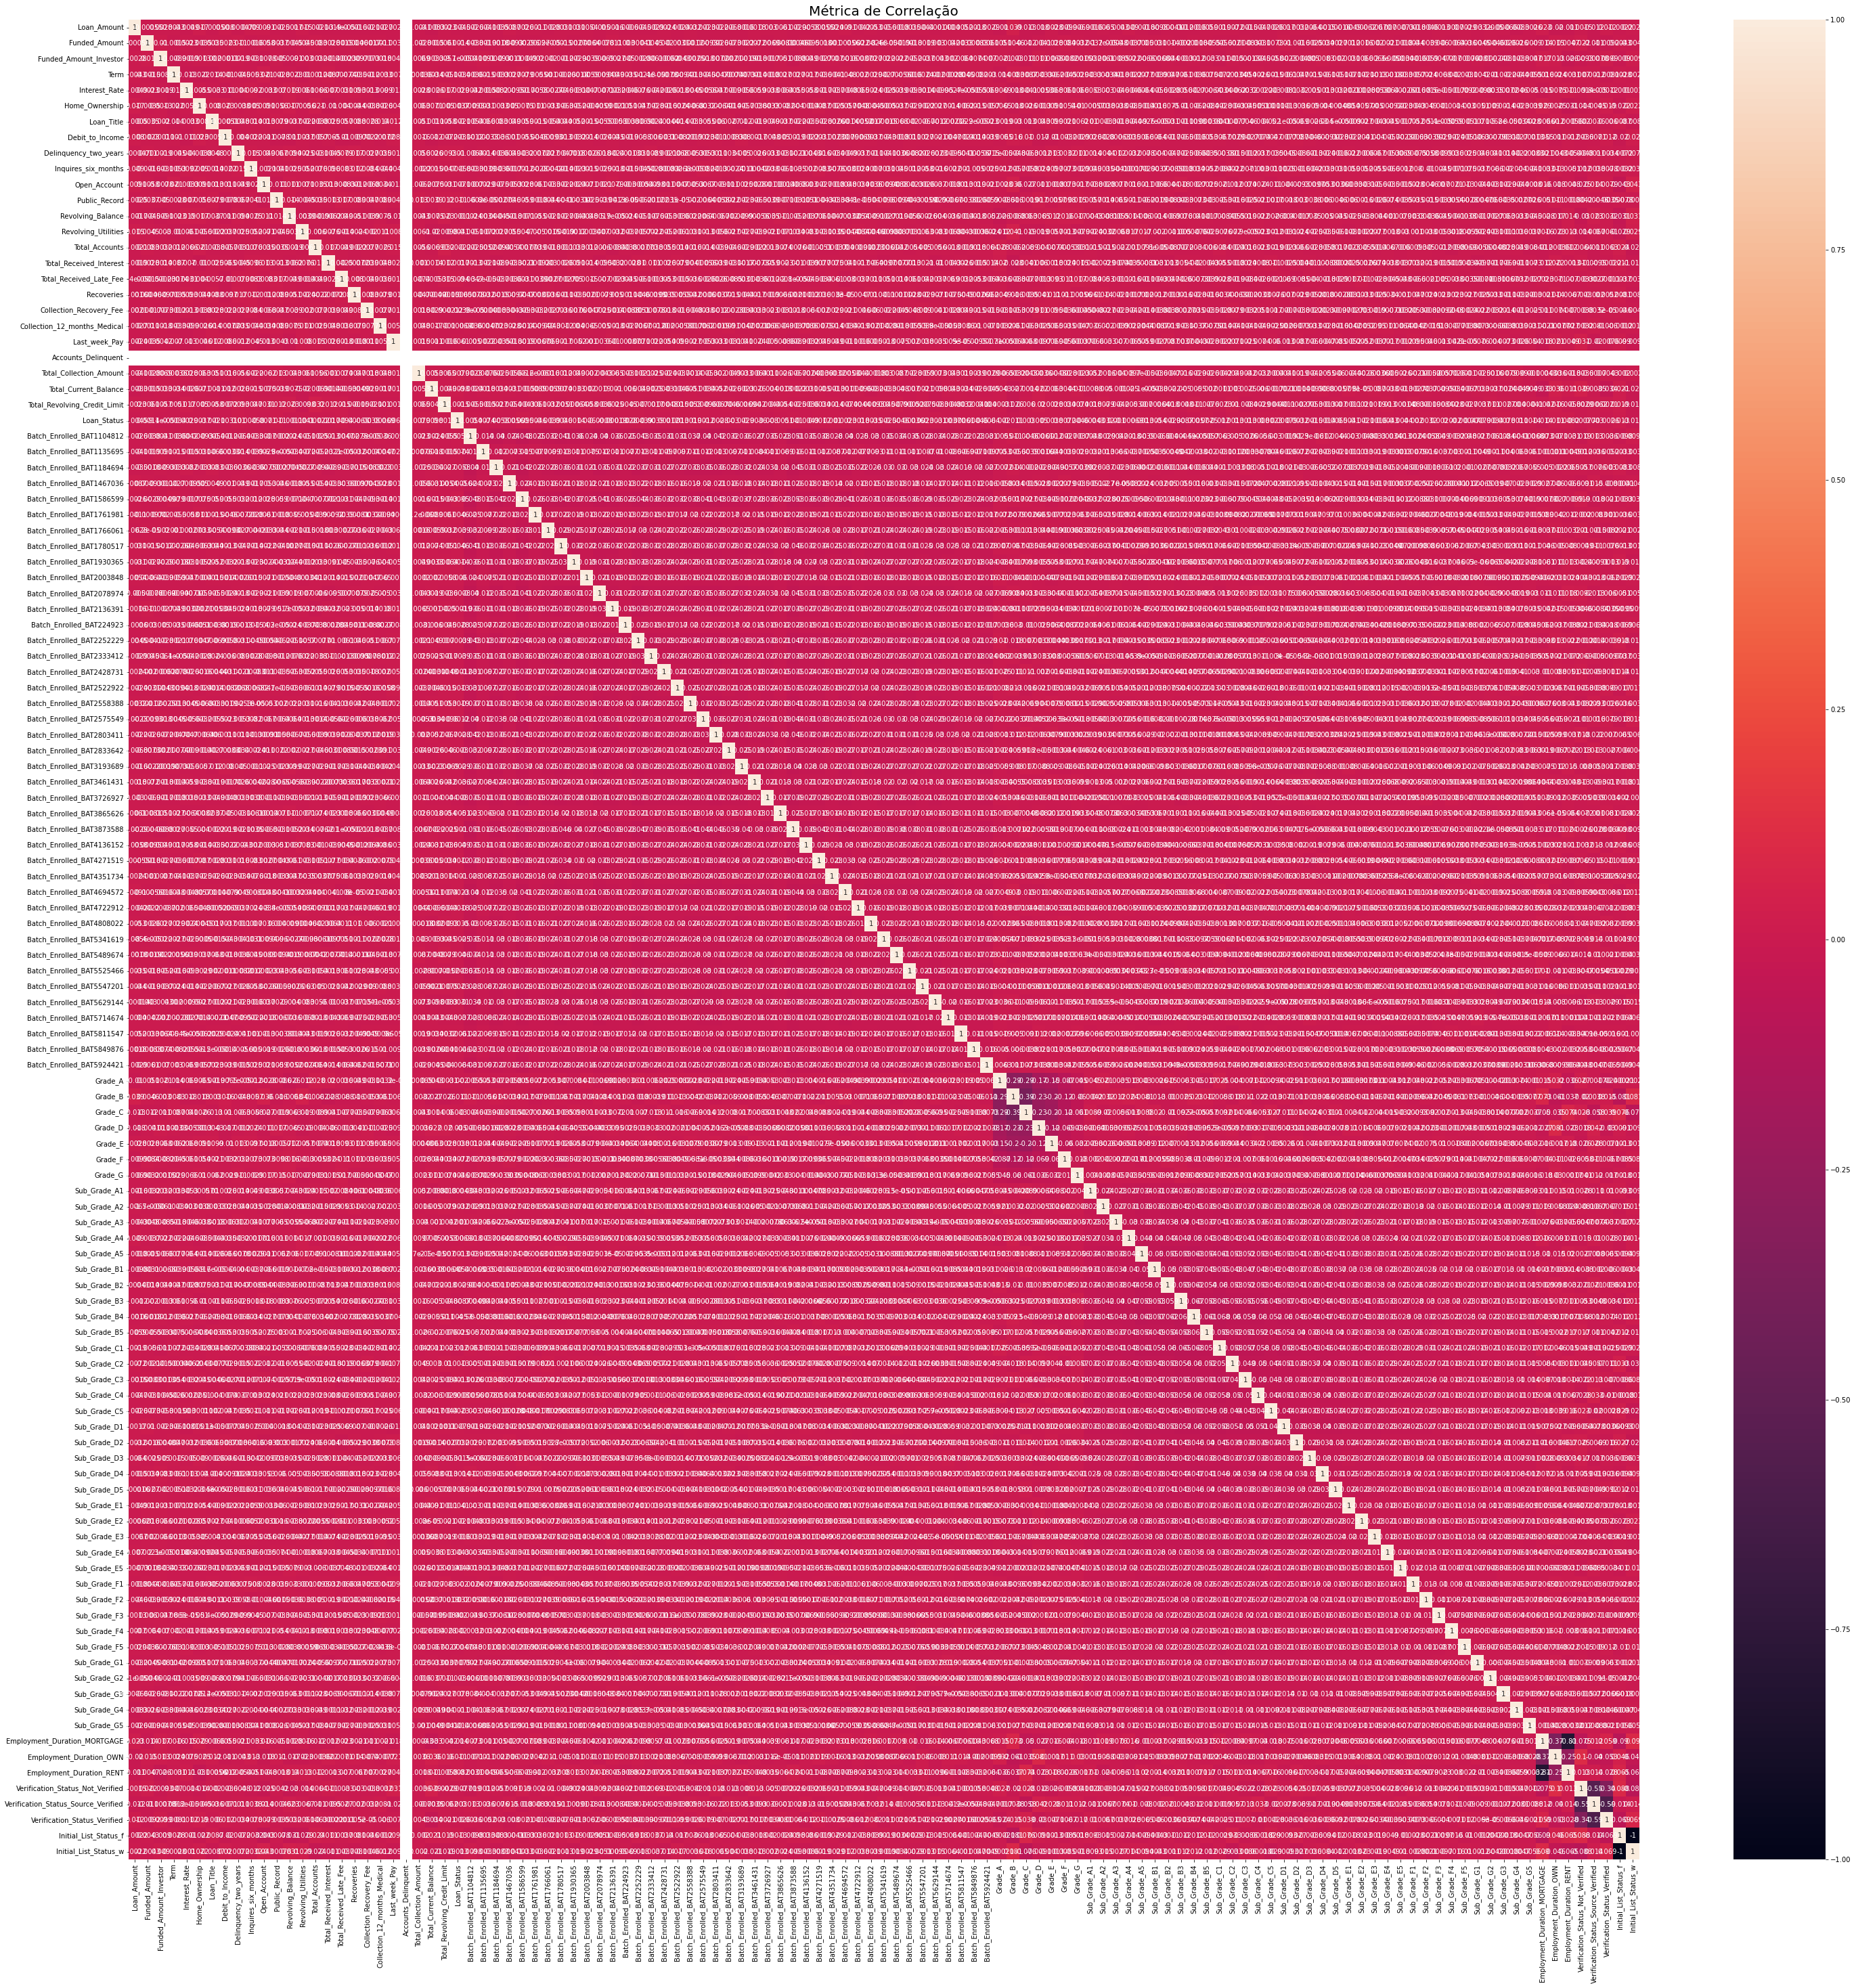

In [24]:
correlation_matrix = dataset_encode.corr(method='pearson')

fig, ax = plt.subplots(figsize=(50,50)) 
sns.heatmap(correlation_matrix, annot=True, ax=ax)
plt.title('Métrica de Correlação', size=20)

In [32]:
features_examples = ['Loan_Status','Accounts_Delinquent'
            ,'Interest_Rate','Initial_List_Status_f', 'Initial_List_Status_w'
            ,'Grade_A','Grade_B','Grade_C','Grade_D','Grade_E','Grade_F','Grade_G'
            ,'Employment_Duration_MORTGAGE', 'Employment_Duration_OWN', 'Employment_Duration_RENT','Home_Ownership'
            ,'Verification_Status_Not_Verified','Verification_Status_Source_Verified','Verification_Status_Verified'
            ,'Loan_Title','Debit_to_Income','Delinquency_two_years','Inquires_six_months','Open_Account','Revolving_Balance','Revolving_Utilities','Total_Accounts']

In [45]:
features_grades = ['Loan_Status',
     'Employment_Duration_MORTGAGE', 'Employment_Duration_OWN', 'Employment_Duration_RENT','Home_Ownership'
    ,'Verification_Status_Not_Verified','Verification_Status_Source_Verified','Verification_Status_Verified',      
    'Grade_A','Grade_B','Grade_C','Grade_D','Grade_E','Grade_F','Grade_G',
   'Batch_Enrolled_BAT1104812', 'Batch_Enrolled_BAT1135695', 'Batch_Enrolled_BAT1184694', 
'Batch_Enrolled_BAT1467036', 'Batch_Enrolled_BAT1586599', 'Batch_Enrolled_BAT1761981',
'Batch_Enrolled_BAT1766061', 'Batch_Enrolled_BAT1780517', 'Batch_Enrolled_BAT1930365', 
'Batch_Enrolled_BAT2003848', 'Batch_Enrolled_BAT2078974', 'Batch_Enrolled_BAT2136391', 
'Batch_Enrolled_BAT224923', 'Batch_Enrolled_BAT2252229', 'Batch_Enrolled_BAT2333412', 'Batch_Enrolled_BAT2428731',
'Batch_Enrolled_BAT2522922', 'Batch_Enrolled_BAT2558388', 'Batch_Enrolled_BAT2575549', 'Batch_Enrolled_BAT2803411',
'Batch_Enrolled_BAT2833642', 'Batch_Enrolled_BAT3193689', 'Batch_Enrolled_BAT3461431', 'Batch_Enrolled_BAT3726927', 
'Batch_Enrolled_BAT3865626', 'Batch_Enrolled_BAT3873588', 'Batch_Enrolled_BAT4136152', 'Batch_Enrolled_BAT4271519', 
'Batch_Enrolled_BAT4351734', 'Batch_Enrolled_BAT4694572', 'Batch_Enrolled_BAT4722912', 'Batch_Enrolled_BAT4808022', 
'Batch_Enrolled_BAT5341619', 'Batch_Enrolled_BAT5489674', 'Batch_Enrolled_BAT5525466', 'Batch_Enrolled_BAT5547201', 
'Batch_Enrolled_BAT5629144', 'Batch_Enrolled_BAT5714674', 'Batch_Enrolled_BAT5811547', 'Batch_Enrolled_BAT5849876', 
'Batch_Enrolled_BAT5924421']

In [46]:
dataset_example = dataset_encode[features_grades]

Text(0.5, 1.0, 'Métrica de Correlação')

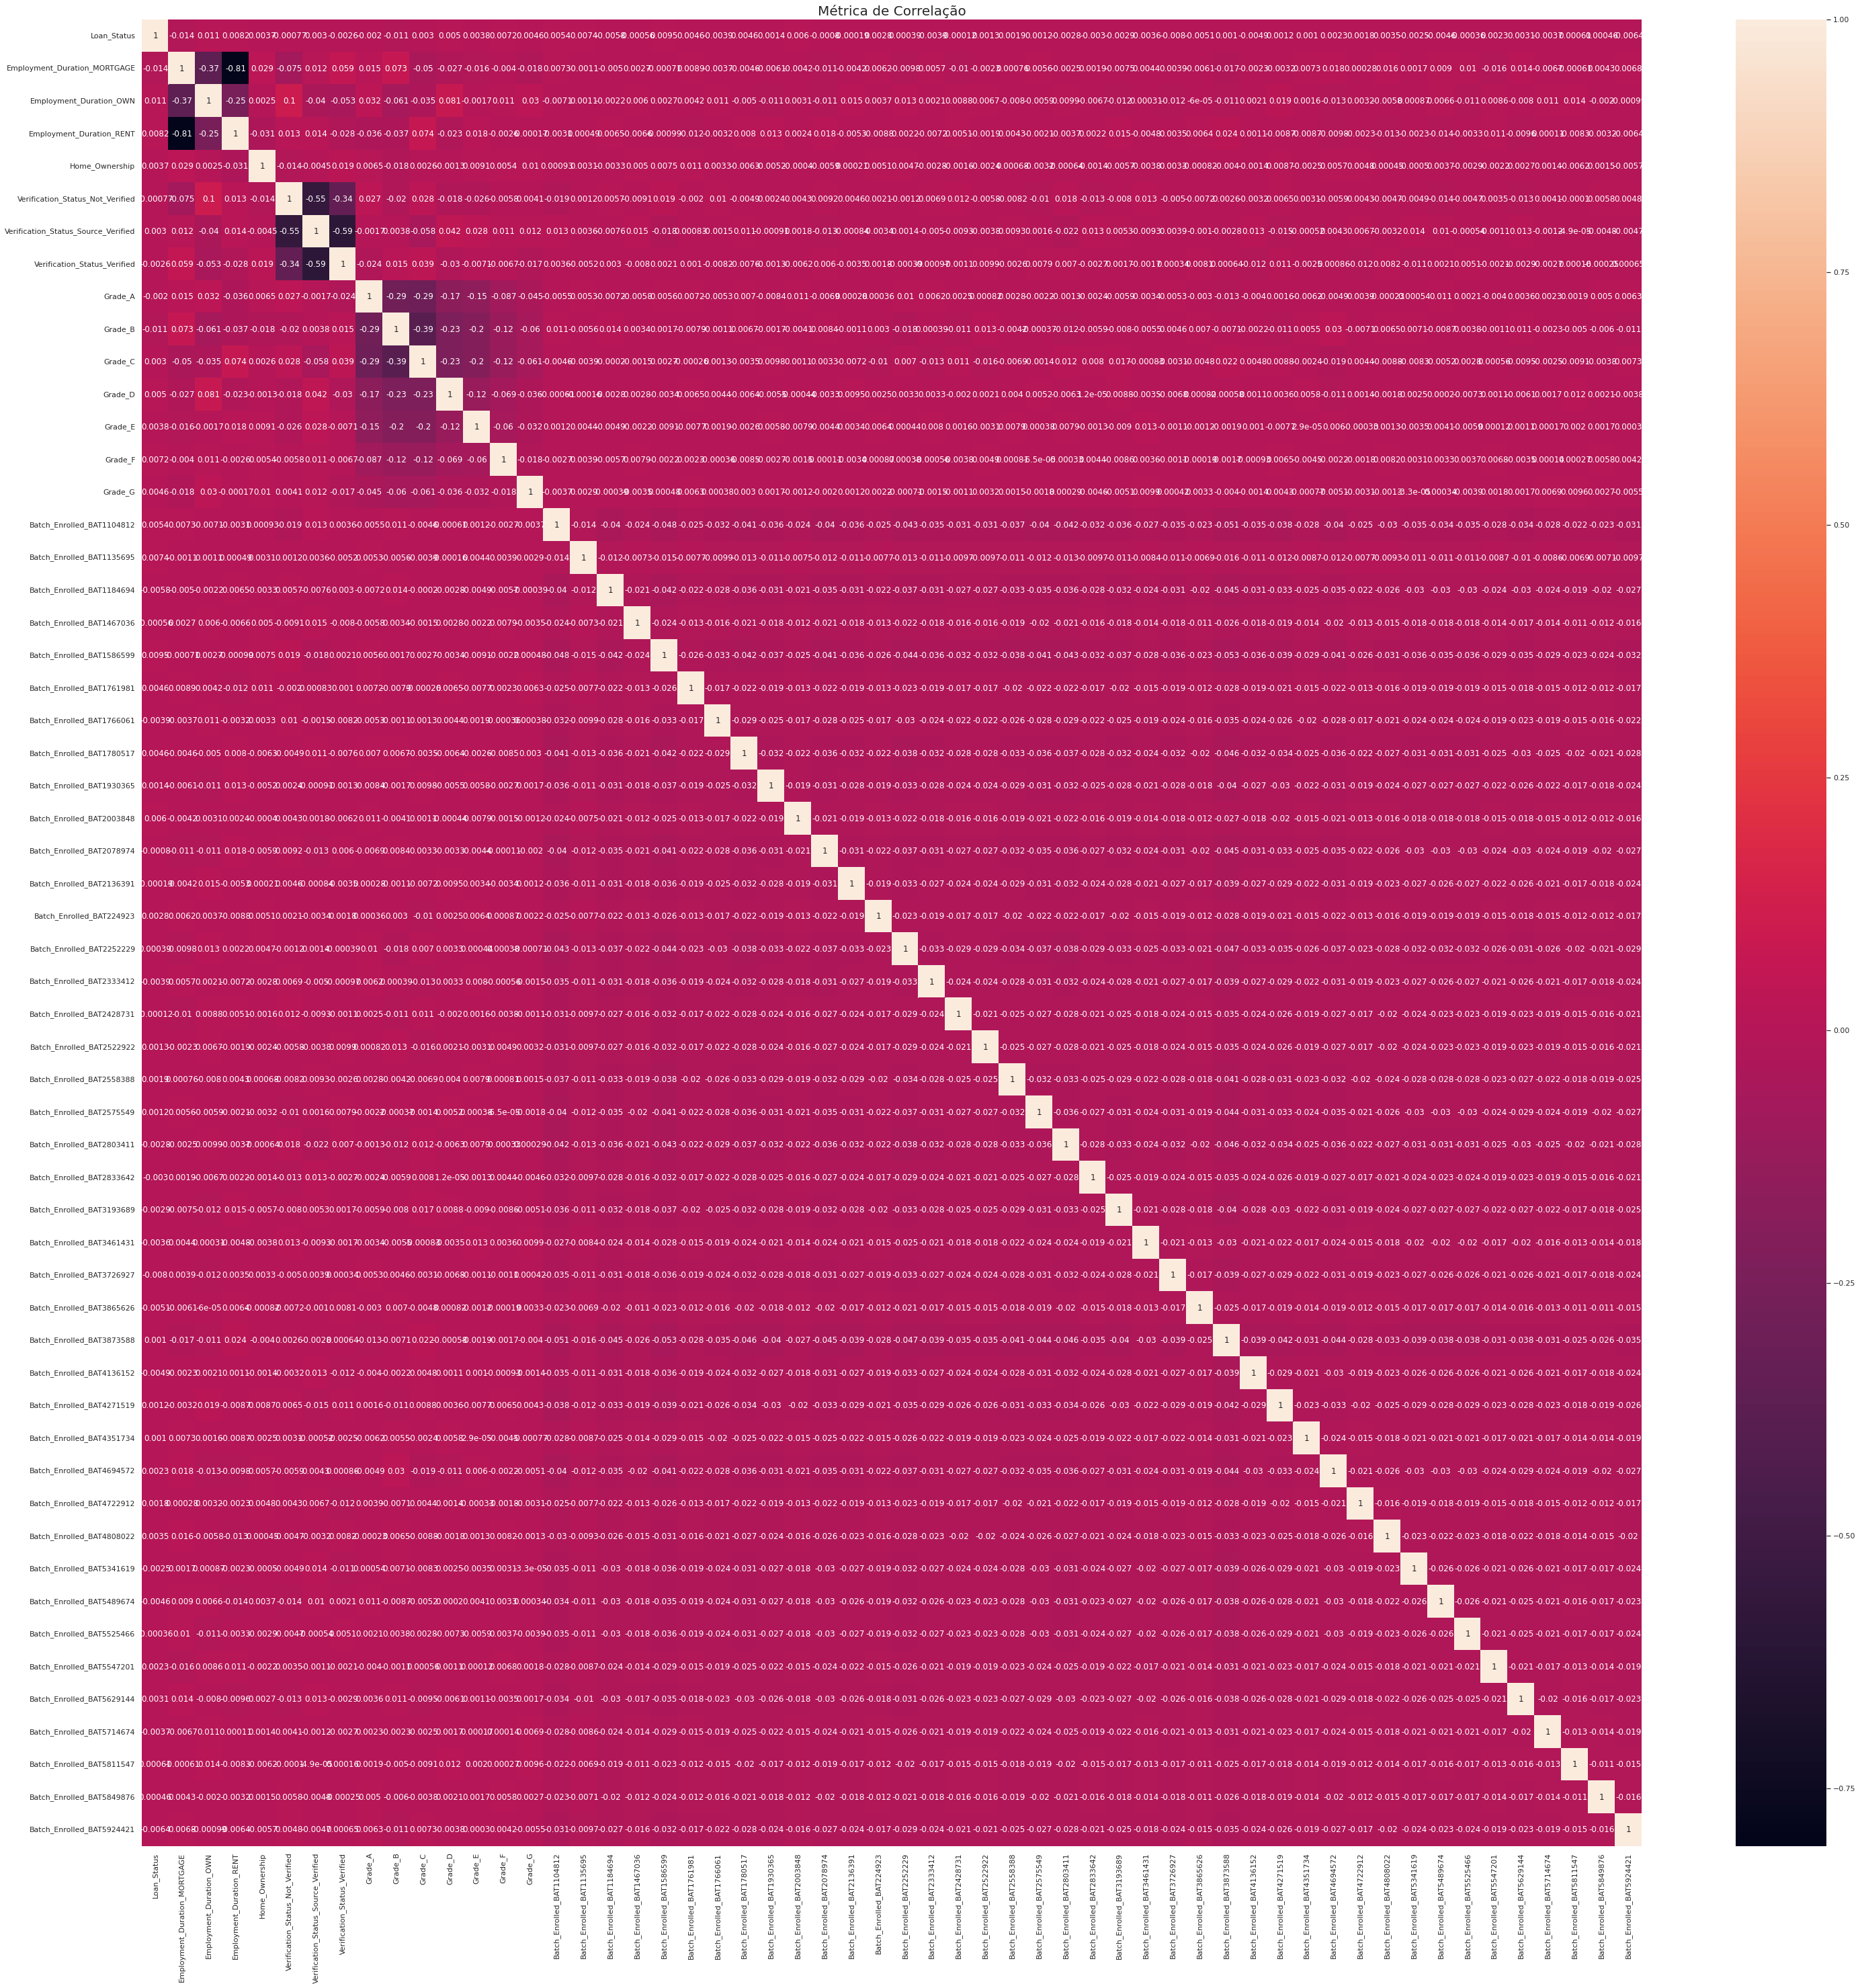

In [47]:
correlation_matrix = dataset_example.corr(method='pearson')

fig, ax = plt.subplots(figsize=(50,50)) 
sns.heatmap(correlation_matrix, annot=True, ax=ax)
plt.title('Métrica de Correlação', size=20)

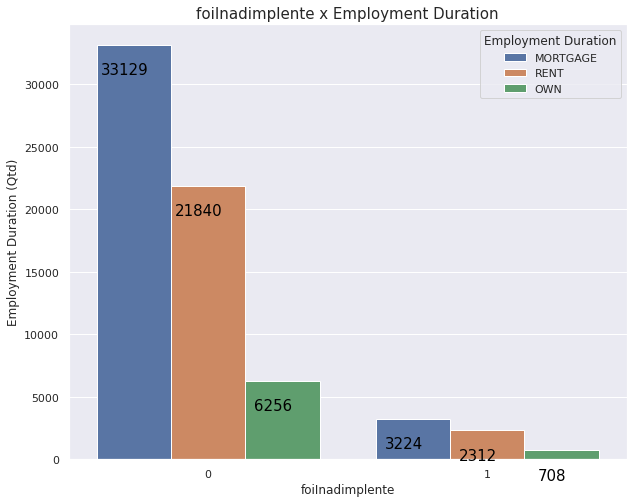

In [50]:
columns = ['Employment Duration']
for column in columns:
    sns.set_theme(style="darkgrid")
    fig, axs = plt.subplots(figsize=[10,8])

    ax = sns.countplot(x='Loan Status', hue=column, data=dataset)
    ax.set_title('foiInadimplente x ' + column, fontsize=15)
    ax.set_xlabel('foiInadimplente')
    ax.set_ylabel(column + ' (Qtd)')

    for p in ax.patches:
      ax.annotate(f'\n{p.get_height()+1}', (p.get_x()+0.1, p.get_height()), ha='center', va='top', color='black', size=15)
    plt.show()

In [189]:
dataset_encode.head()

Loan Amount  Funded Amount  Funded Amount Investor  Term  Interest Rate  \
0        10000          32236             12329.36286    59      11.135007   
1         3609          11940             12191.99692    59      12.237563   
2        28276           9311             21603.22455    59      12.545884   
3        11170           6954             17877.15585    59      16.731201   
4        16890          13226             13539.92667    59      15.008300   

   Home Ownership  Loan Title  Debit to Income  Delinquency - two years  \
0    176346.62670           3        16.284758                        1   
1     39833.92100           3        15.412409                        0   
2     91506.69105           3        28.137619                        0   
3    108286.57590           3        18.043730                        1   
4     44234.82545           2        17.209886                        1   

   Inquires - six months  Open Account  Public Record  Revolving Balance  \
0                      0            13              0              24246   
1                      0            12              0                812   
2                      0            14              0               1843   
3                      0             7              0              13819   
4                      3            13              1               1544   

   Revolving Utilities  Total Accounts  Total Received Interest  \
0            74.932551               7              2929.646315   
1            78.297186              13               772.769385   
2             2.073040              20               863.324396   
3            67.467951              12               288.173196   
4            85.250761              22               129.239553   

   Total Received Late Fee   Recoveries  Collection Recovery Fee  \
0                 0.102055     2.498291                 0.793724   
1                 0.036181     2.377215                 0.974821   
2                18.778660     4.316277                 1.020075   
3                 0.044131     0.107020                 0.749971   
4                19.306646  1294.818751                 0.368953   

   Collection 12 months Medical  Last week Pay  Accounts Delinquent  \
0                             0             49                    0   
1                             0            109                    0   
2                             0             66                    0   
3                             0             39                    0   
4                             0             18                    0   

   Total Collection Amount  Total Current Balance  \
0                       31                 311301   
1                       53                 182610   
2                       34                  89801   
3                       40                   9189   
4                      430                 126029   

   Total Revolving Credit Limit  Loan Status  Batch Enrolled_BAT1104812  \
0                          6619            0                          0   
1                         20885            0                          0   
2                         26155            0                          0   
3                         60214            0                          0   
4                         22579            0                          0   

   Batch Enrolled_BAT1135695  Batch Enrolled_BAT1184694  \
0                          0                          0   
1                          0                          0   
2                          0                          0   
3                          0                          0   
4                          0                          0   

   Batch Enrolled_BAT1467036  Batch Enrolled_BAT1586599  \
0                          0                          0   
1                          0                          1   
2                          0                          0   
3                         

## Setando as Features e a variável Target

In [216]:
target = 'Loan_Status'
target

'Loan_Status'

In [215]:
features = ['Loan_Amount', 'Funded_Amount', 'Funded_Amount_Investor', 'Term', 'Interest_Rate', 'Home_Ownership', 'Loan_Title', 'Debit_to_Income', 'Delinquency_two_years', 'Inquires_six_months', 'Open_Account', 'Public_Record', 'Revolving_Balance', 'Revolving_Utilities', 'Total_Accounts', 'Total_Received_Interest', 'Total_Received_Late_Fee', 'Recoveries', 'Collection_Recovery_Fee', 'Collection_12_months_Medical', 'Last_week_Pay', 'Accounts_Delinquent', 'Total_Collection_Amount', 'Total_Current_Balance', 'Total_Revolving_Credit_Limit', 'Loan_Status', 'Batch_Enrolled_BAT1104812', 'Batch_Enrolled_BAT1135695', 'Batch_Enrolled_BAT1184694', 'Batch_Enrolled_BAT1467036', 'Batch_Enrolled_BAT1586599', 'Batch_Enrolled_BAT1761981', 'Batch_Enrolled_BAT1766061', 'Batch_Enrolled_BAT1780517', 'Batch_Enrolled_BAT1930365', 'Batch_Enrolled_BAT2003848', 'Batch_Enrolled_BAT2078974', 'Batch_Enrolled_BAT2136391', 'Batch_Enrolled_BAT224923', 'Batch_Enrolled_BAT2252229', 'Batch_Enrolled_BAT2333412', 'Batch_Enrolled_BAT2428731', 'Batch_Enrolled_BAT2522922', 'Batch_Enrolled_BAT2558388', 'Batch_Enrolled_BAT2575549', 'Batch_Enrolled_BAT2803411', 'Batch_Enrolled_BAT2833642', 'Batch_Enrolled_BAT3193689', 'Batch_Enrolled_BAT3461431', 'Batch_Enrolled_BAT3726927', 'Batch_Enrolled_BAT3865626', 'Batch_Enrolled_BAT3873588', 'Batch_Enrolled_BAT4136152', 'Batch_Enrolled_BAT4271519', 'Batch_Enrolled_BAT4351734', 'Batch_Enrolled_BAT4694572', 'Batch_Enrolled_BAT4722912', 'Batch_Enrolled_BAT4808022', 'Batch_Enrolled_BAT5341619', 'Batch_Enrolled_BAT5489674', 'Batch_Enrolled_BAT5525466', 'Batch_Enrolled_BAT5547201', 'Batch_Enrolled_BAT5629144', 'Batch_Enrolled_BAT5714674', 'Batch_Enrolled_BAT5811547', 'Batch_Enrolled_BAT5849876', 'Batch_Enrolled_BAT5924421', 'Grade_A', 'Grade_B', 'Grade_C', 'Grade_D', 'Grade_E', 'Grade_F', 'Grade_G', 'Sub_Grade_A1', 'Sub_Grade_A2', 'Sub_Grade_A3', 'Sub_Grade_A4', 'Sub_Grade_A5', 'Sub_Grade_B1', 'Sub_Grade_B2', 'Sub_Grade_B3', 'Sub_Grade_B4', 'Sub_Grade_B5', 'Sub_Grade_C1', 'Sub_Grade_C2', 'Sub_Grade_C3', 'Sub_Grade_C4', 'Sub_Grade_C5', 'Sub_Grade_D1', 'Sub_Grade_D2', 'Sub_Grade_D3', 'Sub_Grade_D4', 'Sub_Grade_D5', 'Sub_Grade_E1', 'Sub_Grade_E2', 'Sub_Grade_E3', 'Sub_Grade_E4', 'Sub_Grade_E5', 'Sub_Grade_F1', 'Sub_Grade_F2', 'Sub_Grade_F3', 'Sub_Grade_F4', 'Sub_Grade_F5', 'Sub_Grade_G1', 'Sub_Grade_G2', 'Sub_Grade_G3', 'Sub_Grade_G4', 'Sub_Grade_G5', 'Employment_Duration_MORTGAGE', 'Employment_Duration_OWN', 'Employment_Duration_RENT', 'Verification_Status_Not_Verified', 'Verification_Status_Source_Verified', 'Verification_Status_Verified', 'Initial_List_Status_f', 'Initial_List_Status_w']

In [218]:
dataset_encode.to_csv(r'dataset_loan_bank_all_vars.csv', index=False)

In [219]:
dataset_encode.head()

Loan_Amount  Funded_Amount  Funded_Amount_Investor  Term  Interest_Rate  \
0        10000          32236             12329.36286    59      11.135007   
1         3609          11940             12191.99692    59      12.237563   
2        28276           9311             21603.22455    59      12.545884   
3        11170           6954             17877.15585    59      16.731201   
4        16890          13226             13539.92667    59      15.008300   

   Home_Ownership  Loan_Title  Debit_to_Income  Delinquency_two_years  \
0    176346.62670           3        16.284758                      1   
1     39833.92100           3        15.412409                      0   
2     91506.69105           3        28.137619                      0   
3    108286.57590           3        18.043730                      1   
4     44234.82545           2        17.209886                      1   

   Inquires_six_months  Open_Account  Public_Record  Revolving_Balance  \
0                    0            13              0              24246   
1                    0            12              0                812   
2                    0            14              0               1843   
3                    0             7              0              13819   
4                    3            13              1               1544   

   Revolving_Utilities  Total_Accounts  Total_Received_Interest  \
0            74.932551               7              2929.646315   
1            78.297186              13               772.769385   
2             2.073040              20               863.324396   
3            67.467951              12               288.173196   
4            85.250761              22               129.239553   

   Total_Received_Late_Fee   Recoveries  Collection_Recovery_Fee  \
0                 0.102055     2.498291                 0.793724   
1                 0.036181     2.377215                 0.974821   
2                18.778660     4.316277                 1.020075   
3                 0.044131     0.107020                 0.749971   
4                19.306646  1294.818751                 0.368953   

   Collection_12_months_Medical  Last_week_Pay  Accounts_Delinquent  \
0                             0             49                    0   
1                             0            109                    0   
2                             0             66                    0   
3                             0             39                    0   
4                             0             18                    0   

   Total_Collection_Amount  Total_Current_Balance  \
0                       31                 311301   
1                       53                 182610   
2                       34                  89801   
3                       40                   9189   
4                      430                 126029   

   Total_Revolving_Credit_Limit  Loan_Status  Batch_Enrolled_BAT1104812  \
0                          6619            0                          0   
1                         20885            0                          0   
2                         26155            0                          0   
3                         60214            0                          0   
4                         22579            0                          0   

   Batch_Enrolled_BAT1135695  Batch_Enrolled_BAT1184694  \
0                          0                          0   
1                          0                          0   
2                          0                          0   
3                          0                          0   
4                          0                          0   

   Batch_Enrolled_BAT1467036  Batch_Enrolled_BAT1586599  \
0                          0                          0   
1                          0                          1   
2                          0                          0   
3                          0                      

In [113]:
train_features = ['Interest_Rate','Initial_List_Status'
            ,'Grade_A','Grade_B','Grade_C','Grade_D','Grade_E','Grade_F','Grade_G','Sub_Grade'
            ,'Employment_Duration_Mortage','Employment_Duration_Rent','Employment_Duration_Own','Home_Ownership'
            ,'Verification_Status_Not_Verified','Verification_Status_Source_Verified','Verification_Status_Verified'
            ,'Loan_Title','Debit_to_Income','Delinquency_two_years','Inquires_six_months','Open_Account','Revolving_Balance','Revolving_Utilities','Total_Accounts','Accounts_Delinquent']

In [114]:
dataset_bank_loan = dataset[features]

In [115]:
dataset_bank_loan.columns

Index(['Loan_Status', 'Interest_Rate', 'Initial_List_Status', 'Grade_A',
       'Grade_B', 'Grade_C', 'Grade_D', 'Grade_E', 'Grade_F', 'Grade_G',
       'Sub_Grade', 'Employment_Duration_Mortage', 'Employment_Duration_Rent',
       'Employment_Duration_Own', 'Home_Ownership',
       'Verification_Status_Not_Verified',
       'Verification_Status_Source_Verified', 'Verification_Status_Verified',
       'Loan_Title', 'Debit_to_Income', 'Delinquency_two_years',
       'Inquires_six_months', 'Open_Account', 'Revolving_Balance',
       'Revolving_Utilities', 'Total_Accounts', 'Accounts_Delinquent'],
      dtype='object')

In [116]:
for col in dataset_bank_loan.columns:
    print(f'a coluna {col} tem os seguintes valores {dataset_bank_loan[col].unique()}')

a coluna Loan_Status tem os seguintes valores [0 1]
a coluna Interest_Rate tem os seguintes valores [11.13500686 12.23756263 12.54588365 ... 19.65094342 13.16909487
 16.03463076]
a coluna Initial_List_Status tem os seguintes valores ['w' 'f']
a coluna Grade_A tem os seguintes valores [0 1]
a coluna Grade_B tem os seguintes valores [1 0]
a coluna Grade_C tem os seguintes valores [0 1]
a coluna Grade_D tem os seguintes valores [0 1]
a coluna Grade_E tem os seguintes valores [0 1]
a coluna Grade_F tem os seguintes valores [0 1]
a coluna Grade_G tem os seguintes valores [0 1]
a coluna Sub_Grade tem os seguintes valores [14 18 19 13 35 15  5 12 10  6  9  4  7 17 11 28 16 27  2  3 26 25  8 29
 31 30 21 22 20 32 24  1 33 23 34]
a coluna Employment_Duration_Mortage tem os seguintes valores [1 0]
a coluna Employment_Duration_Rent tem os seguintes valores [0 1]
a coluna Employment_Duration_Own tem os seguintes valores [0 1]
a coluna Home_Ownership tem os seguintes valores [176346.6267   39833.92

## Retirada de linhas que estão Esperando Liberação do Emprestimo

In [117]:
dataset_bank_loan.shape

(67463, 27)

In [118]:
dataset_filtrado = dataset_bank_loan[(dataset_bank_loan['Initial_List_Status'] == 'f')]

In [119]:
dataset_filtrado['Initial_List_Status'].unique()

array(['f'], dtype=object)

In [120]:
dataset_filtrado.drop(columns=['Initial_List_Status']).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31164 entries, 1 to 67462
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Loan_Status                          31164 non-null  int64  
 1   Interest_Rate                        31164 non-null  float64
 2   Grade_A                              31164 non-null  int64  
 3   Grade_B                              31164 non-null  int64  
 4   Grade_C                              31164 non-null  int64  
 5   Grade_D                              31164 non-null  int64  
 6   Grade_E                              31164 non-null  int64  
 7   Grade_F                              31164 non-null  int64  
 8   Grade_G                              31164 non-null  int64  
 9   Sub_Grade                            31164 non-null  int64  
 10  Employment_Duration_Mortage          31164 non-null  int64  
 11  Employment_Duration_Rent    

ID - Identificador
Loan Amount - Quantia de empréstimo aplicado
Funded Amount - Quantia do empréstimo financiado
Funded Amount Investor - Quantia do empréstimo aprovado pelos investidores
Term - Prazo do empréstimo (em meses)
Batch Enrolled - Números de lote para representantes
Interest Rate - Taxa de juro (%) sobre empréstimo
Grade - Nota pelo banco ( A ao F)
Sub Grade - Subclassificação de notas pelo banco ( A1 ao F5)
Employment Duration -Mortgage ( Hipotecada ), Own ( Própria ), Rent ( Alugada )
Home Ownership - Proprietário da Casa
Verification Status - Verificação dos rendimentos pelo banco, Source Verified ( Fonte Verificada ), Verified ( Verificado ), Not verified (Não verificado)
Payment Plan - Se algum plano de pagamento começou contra o empréstimo, True & False
Loan Title - Título do empréstimo fornecido, Credit card refinancing ( Refinanciamento por cartão de crédito ), Debt consolidation (Consolidação da dívida), Home Improvement ( Melhoria do lar), Personal ( Pessoal ), Green Loan ( Empréstimos verdes ), Other ( Outros )
Debit to Income - Relação de reembolso da dívida mensal total do representante dividido pelo rendimento mensal autodeclarado, excluindo a hipoteca
Delinquency-two years - Número de vezes em que ficou com infração de 30 ou mais dias nos últimos 2 anos
Inquires -six months - Número total de inquéritos nos últimos 6 meses
Open Account - Quantidade em número de linhas de crédito abertas, na linha de crédito dos representantes.
Public Record - Número de registros públicos pejorativos
Revolving Balance - Saldo total do crédito rotativo
Revolving Utilities - Quantia de crédito que um representante está utilizando, relativamente ao Saldo Rotativo ( Revolving Balance )
Total Accounts - Número total de linhas de crédito disponíveis, na linha de crédito dos representantes.
Initial List Status - Lista de Status do Empréstimo W (Em espera), F (Encaminhado)
Total Received Interest - Juros totais recebidos até à data
Total Received Late Fee - Taxa de atraso total recebida até à data
Recoveries - Cobrança da taxa de recuperação bruta
Collection Recovery Fee - Taxa de correio fora da taxa de recolha
Collection 12 Months Medical - Total de coleções nos últimos 12 meses, excluindo as coleções médicas
Application Type - Indica quando o representante é: indivíduo ( Individual ) ou Conjunto ( Joint )
Last week Pay - Indica quanto tempo (em semanas) um representante pagou o IME após a inscrição do lote
Accounts Delinquent - Número de contas em que o representante é infrator
Total Collection Amount - Saldo corrente total de todas as contas
Total Current Balance - Saldo corrente total de todas as contas
Total Revolving Credit Limit - Limite total do crédito rotativo
Loan Status - 1 = Em situação de inadimplência, 0 = Em situação de não inadimplência

/tmp/ipykernel_9166/4272014911.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


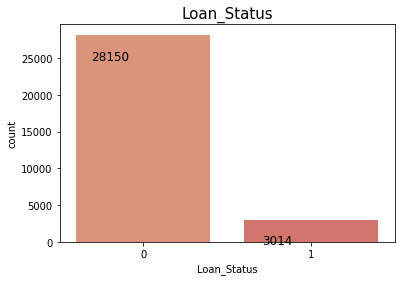

In [121]:
sns.set_palette("flare")
ax = sns.countplot(x='Loan_Status', data=dataset_filtrado)
ax.set_title('Loan_Status', fontsize=15)
ax = plt.subplot()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=12)
plt.show()

## SMOTE DO DATASET

In [122]:
X = dataset_filtrado[train_features]
y = dataset_filtrado[target]

In [123]:
over = RandomOverSampler(sampling_strategy=0.5)
X_over, y_over = over.fit_resample(X, y)

In [124]:
dataset_bank_loan_over_05 = pd.concat([pd.DataFrame(X_over),pd.DataFrame(y_over)],axis=1)
dataset_bank_loan_over_05

Interest_Rate Initial_List_Status  Grade_A  Grade_B  Grade_C  Grade_D  \
0          12.237563                   f        0        0        1        0   
1           5.520413                   f        0        0        1        0   
2           8.627337                   f        0        1        0        0   
3           9.016252                   f        0        0        1        0   
4          14.848190                   f        0        1        0        0   
...              ...                 ...      ...      ...      ...      ...   
42220       8.573783                   f        0        0        1        0   
42221      10.476915                   f        0        1        0        0   
42222       6.407209                   f        0        0        1        0   
42223      11.208387                   f        0        1        0        0   
42224       6.387825                   f        0        1        0        0   

       Grade_E  Grade_F  Grade_G  Sub_Grade  ...  Loan_Title  Debit_to_Income  \
0            0        0        0         18  ...           3        15.412409   
1            0        0        0         10  ...           2        10.048549   
2            0        0        0          5  ...           3        14.266474   
3            0        0        0          9  ...           3        29.232811   
4            0        0        0          4  ...           2        17.715302   
...        ...      ...      ...        ...  ...         ...              ...   
42220        0        0        0          5  ...           2        31.986298   
42221        0        0        0          5  ...           2        36.600210   
42222        0        0        0         15  ...           3        21.149032   
42223        0        0        0         11  ...           2        31.824949   
42224        0        0        0          9  ...           3        25.553355   

       Delinquency_two_years  Inquires_six_months  Open_Account  \
0                          0                    0            12   
1                          1                    0            11   
2                          0                    0            17   
3                          0                    0            10   
4                          0                    0             9   
...                      ...                  ...           ...   
42220                      0                    0            13   
42221                      0                    0             8   
42222                      0                    0             7   
42223                      0                    1             8   
42224                      0                    0            15   

       Revolving_Balance  Revolving_Utilities  Total_Accounts  \
0                    812            78.297186              13   
1                   1361            35.073345              30   
2                   4005            61.279556              46   
3                    542            46.390512              12   
4                   5904            44.388997              13   
...                  ...                  ...             ...   
42220               3609            67.224519              15   
42221               5096            37.820011              18   
42222               7590            53.622170              26   
42223               7587            64.697228               8   
42224               6090            10.925298               5   

       Accounts_Delinquent  Loan_Status  
0                        0            0  
1                        0            0  
2                        0            0  
3                        0            0  
4                        0            1  
...                    ...          ...  
42220                    0            1  
42221                    0            1  
42222                    0            1  
42223                    0            1  
42224                    

In [125]:
dataset_bank_loan_over_05.columns

Index(['Interest_Rate', 'Initial_List_Status', 'Grade_A', 'Grade_B', 'Grade_C',
       'Grade_D', 'Grade_E', 'Grade_F', 'Grade_G', 'Sub_Grade',
       'Employment_Duration_Mortage', 'Employment_Duration_Rent',
       'Employment_Duration_Own', 'Home_Ownership',
       'Verification_Status_Not_Verified',
       'Verification_Status_Source_Verified', 'Verification_Status_Verified',
       'Loan_Title', 'Debit_to_Income', 'Delinquency_two_years',
       'Inquires_six_months', 'Open_Account', 'Revolving_Balance',
       'Revolving_Utilities', 'Total_Accounts', 'Accounts_Delinquent',
       'Loan_Status'],
      dtype='object')

In [126]:
print(f'Tamanho dataset original {len(dataset_bank_loan)} dataset com smot {len(dataset_bank_loan_over_05)}')

Tamanho dataset original 67463 dataset com smot 42225


## Export Dataset

In [127]:
dataset_filtrado.to_csv(r'dataset_loan_bank_05_filtrado.csv', index=False)